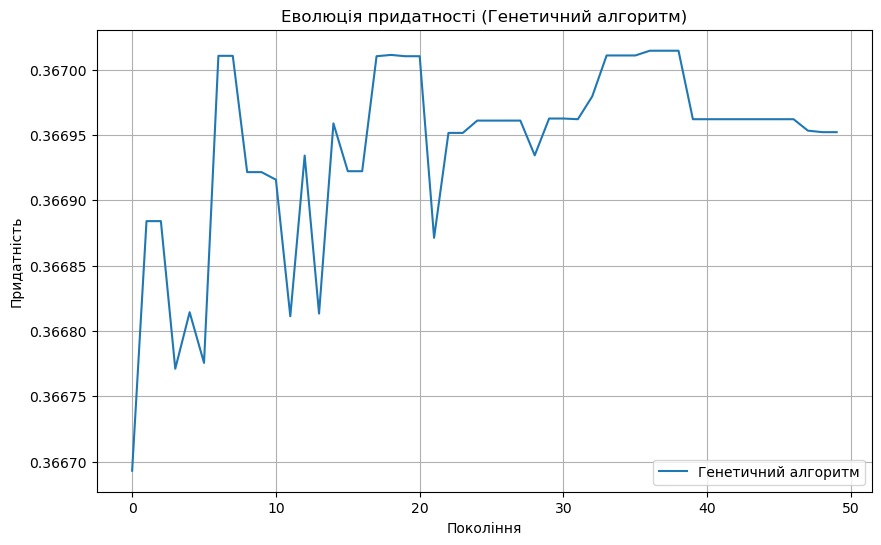

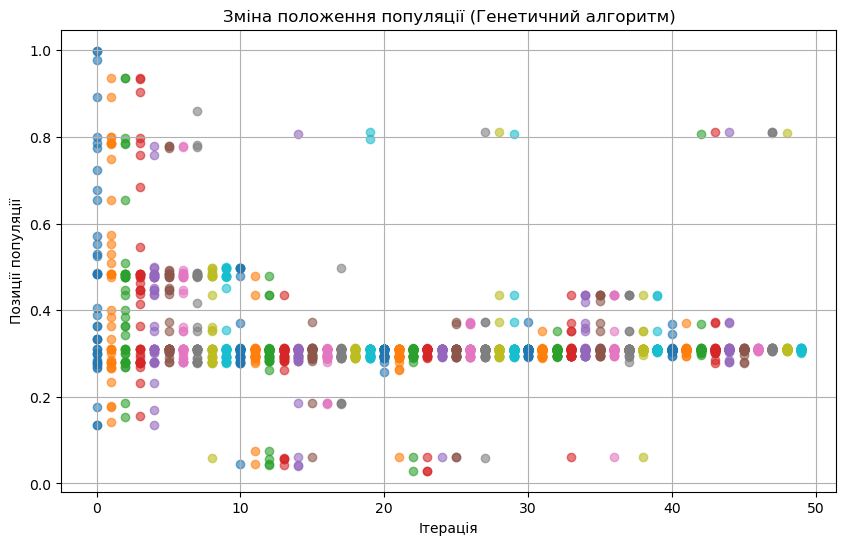

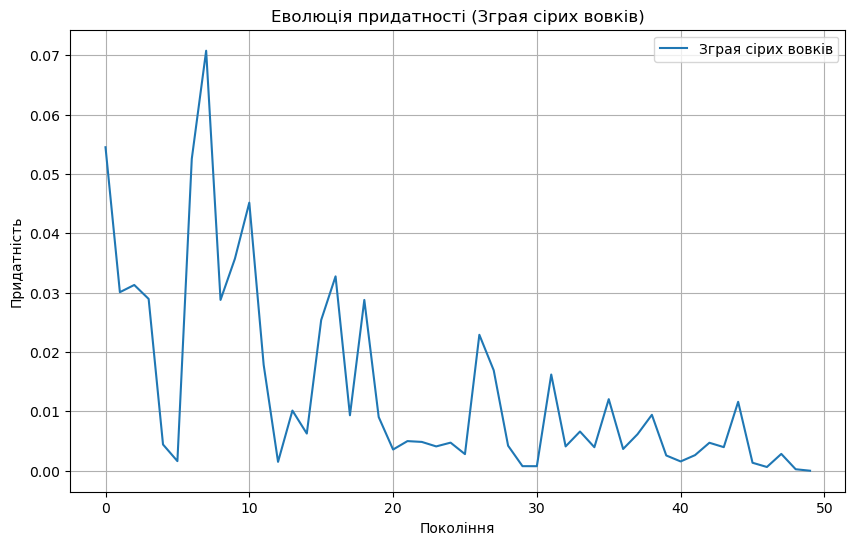

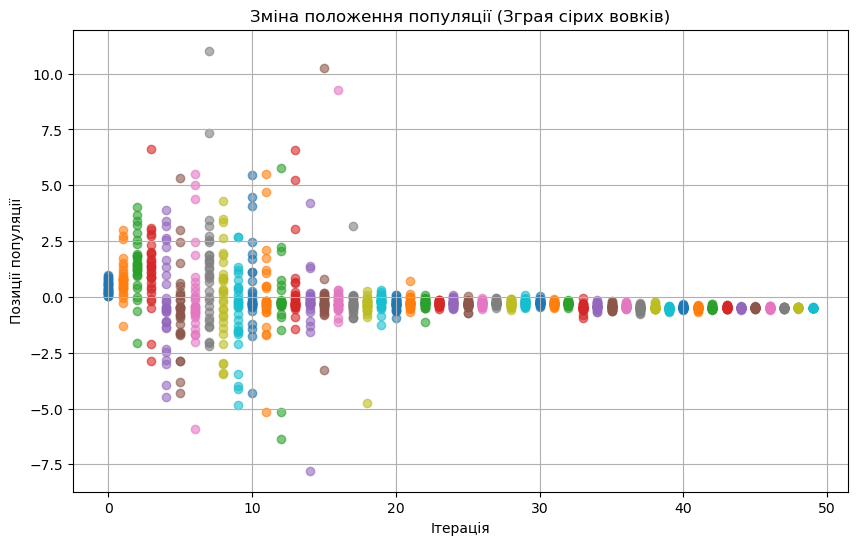

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Врахування пункту 2
# У генетичному алгоритмі (GA) всі процеси (схрещування, мутацію та відбір) розглядаємо у двійковому коді. 
# Двійковий код переводимо у дійсне число через нормалізацію до діапазону [a, b].

class GeneticSolver:
    def __init__(self, bounds, genome_size, population_count, generations=100, mutation_rate=0.01, crossover_rate=0.7, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.genome_size = genome_size
        self.population_count = population_count
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.population = self.create_initial_population()

    def create_initial_population(self):
        return [''.join(np.random.choice(['0', '1'], self.genome_size)) for _ in range(self.population_count)]

    def decode_genome(self, genome):
        value = int(genome, 2)
        return self.low + (value / (2**self.genome_size - 1)) * (self.high - self.low)

    def calculate_fitness(self, x):
        return np.abs(0.2 - (-x)*(1-x)*np.cos(6*np.pi*x)*np.cos(7*np.pi*x))

    def select_parents(self):
        fitness = np.array([self.calculate_fitness(self.decode_genome(gen)) for gen in self.population])
        probabilities = fitness / fitness.sum()
        parents = np.random.choice(self.population, size=self.population_count, p=probabilities)
        return parents

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.genome_size - 1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
            return child1, child2
        return parent1, parent2

    def mutate(self, genome):
        genome = list(genome)
        for i in range(len(genome)):
            if np.random.rand() < self.mutation_rate:
                genome[i] = '1' if genome[i] == '0' else '0'
        return ''.join(genome)

    def evolve(self):
        best_fitness = []
        decoded_values = []
        positions_over_time = []  # Збереження позицій для кожної ітерації (пункт 4)
        for generation in range(self.generations):
            parents = self.select_parents()
            next_generation = []
            for i in range(0, len(parents), 2):
                parent1, parent2 = parents[i], parents[i+1]
                child1, child2 = self.crossover(parent1, parent2)
                next_generation.append(self.mutate(child1))
                next_generation.append(self.mutate(child2))
            self.population = next_generation[:self.population_count]
            decoded = [self.decode_genome(gen) for gen in self.population]
            fitness = [self.calculate_fitness(x) for x in decoded]
            best_fitness.append(max(fitness))
            decoded_values.append(decoded)
            positions_over_time.append(decoded)  # Зберігаємо поточні позиції
        self.plot_evolution(best_fitness, decoded_values)
        self.plot_population_evolution(positions_over_time)  # Візуалізація позицій (пункт 4)

    def plot_evolution(self, fitness_history, decoded_values):
        plt.figure(figsize=(10, 6))
        plt.plot(fitness_history, label='Генетичний алгоритм')
        plt.xlabel('Покоління')
        plt.ylabel('Придатність')
        plt.title('Еволюція придатності (Генетичний алгоритм)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_population_evolution(self, positions_over_time):
        plt.figure(figsize=(10, 6))
        for i, positions in enumerate(positions_over_time):
            plt.scatter([i] * len(positions), positions, alpha=0.6, label=f'Ітерація {i+1}' if i == 0 else '')
        plt.xlabel('Ітерація')
        plt.ylabel('Позиції популяції')
        plt.title('Зміна положення популяції (Генетичний алгоритм)')
        plt.grid(True)
        plt.show()

class GreyWolfOptimizer:
    def __init__(self, bounds, wolves_count, generations=100, seed=42):
        np.random.seed(seed)
        self.low, self.high = bounds
        self.wolves_count = wolves_count
        self.generations = generations
        self.positions = np.random.uniform(self.low, self.high, wolves_count)

    def fitness_function(self, x):
        return np.abs(0.2 - (-x)*(1-x)*np.cos(6*np.pi*x)*np.cos(7*np.pi*x))

    def optimize(self):
        fitness_history = []
        positions_over_time = []  # Збереження позицій для кожної ітерації (пункт 4)
        for gen in range(self.generations):
            fitness = [self.fitness_function(pos) for pos in self.positions]
            fitness_history.append(min(fitness))
            positions_over_time.append(self.positions.copy())  # Додаємо поточні позиції
            alpha = self.positions[np.argmin(fitness)]
            a = 2 - gen * (2 / self.generations)
            for i in range(self.wolves_count):
                A = 2 * a * np.random.rand() - a
                C = 2 * np.random.rand()
                D_alpha = np.abs(C * alpha - self.positions[i])
                self.positions[i] = alpha - A * D_alpha
        self.plot_evolution(fitness_history)
        self.plot_population_evolution(positions_over_time)  # Візуалізація позицій
        return alpha

    def plot_evolution(self, fitness_history):
        plt.figure(figsize=(10, 6))
        plt.plot(fitness_history, label='Зграя сірих вовків')
        plt.xlabel('Покоління')
        plt.ylabel('Придатність')
        plt.title('Еволюція придатності (Зграя сірих вовків)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_population_evolution(self, positions_over_time):
        plt.figure(figsize=(10, 6))
        for i, positions in enumerate(positions_over_time):
            plt.scatter([i] * len(positions), positions, alpha=0.6)
        plt.xlabel('Ітерація')
        plt.ylabel('Позиції популяції')
        plt.title('Зміна положення популяції (Зграя сірих вовків)')
        plt.grid(True)
        plt.show()

bounds = (0, 1)
solver = GeneticSolver(bounds, 18, 40, 50, 0.01, 0.7)
solver.evolve()

gwo_solver = GreyWolfOptimizer(bounds, 30, 50)
gwo_best = gwo_solver.optimize()


**Висновки**:
1. Додано графіки для кожної ітерації як для генетичного алгоритму (GA), так і для алгоритму зграї сірих вовків (GWO). Показано, як популяції сходяться до оптимумів (додано також пояснення в коді).
2. Аналізуємо графік для GA: початкові позиції розташовані у всьому діапазоні [0, 1]; з часом більшість точок сходиться до центральної області, особливо близько до 0.4. До 20-ї ітерації відбувається активне пересування, а потім процес стабілізується. Отже, **GA шукає локальні оптимуми** через рекомбінацію та мутацію, але може застрягти у локальному мінімумі.
3. Аналізуємо графік для GWO: Початкові позиції перебувають у широкому діапазоні (від -10 до 10), що дозволяє досліджувати більше простору; відбувається зміщення точок до 0 на пізніх ітераціях. Від 10-ї ітерації більшість точок вже наближається до оптимуму. Отже, **GWO краще утримує глобальний оптимум**, порівняно з GA, завдяки стратегічному зосередженню навколо найкращого рішення.
4. Можемо зробити висновок, що GA добре працює для локальних мінімумів, а також підходить для функцій з великою кількістю локальних екстремумів. Натомість GWO швидше сходиться до глобального мінімуму, а також ефективний для функцій із добре визначеним глобальним екстремумом.